# homework 4
Estimate $\pi$ using random numbers.  The basic idea is to play darts on a 2x2 square in which a circle of radius one is placed.  You now throw random darts at this board and you have to figure out how to calculate $\pi$ by counting how many darts hit the circle and how many darts miss.  You can use any python, numpy, scipy, matplotlib function that you like, but I want you to be conscious of computational and coding efficiency.
Also, please calculate how accurately you can estimate $\pi$ using this method given that you throw $N$ darts (Remember what I told you about counting errors).

In [1]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
#import seaborn as sns

In [155]:
def darts(N,R):                   # N=how many dots   R=how many rounds
    prob = []
    for i in range(R):
        x = 2.0*np.random.rand(N)-1
        y = 2.0*np.random.rand(N)-1
        far = x**2+y**2
        count = [(int(t<1)+int(not(t>1)))/2 for t in far]
        prob.append(sum(count)/N*4.0)
    prob=np.array(prob)
    pi = np.mean(prob)
    err = np.std(prob)
    
    print("The estimated π is",pi)
    print('The theoretical error is',round(1/np.sqrt(N),4))
    print('The experimental error is',round(err,4))
    return np.vstack([x,y,count,err*np.ones(N)])

In [164]:
def darts_silent(N,R):
    prob = []
    for i in range(R):
        x = 2.0*np.random.rand(N)-1
        y = 2.0*np.random.rand(N)-1
        far = x**2+y**2
        count = [(int(t<1)+int(not(t>1)))/2 for t in far]
        prob.append(sum(count)/N*4.0)
    prob=np.array(prob)
    pi = np.mean(prob)
    err = np.std(prob)
    print('#',end='')
    return np.vstack([x,y,count,err*np.ones(N)])

In [105]:
#********************** PLOT *****************************
def curve(source):
    x= source[0]
    y=source[1]
    count=source[2]
    # here is some help with the figure.
    # All you need to do is to add the hits and missed with different colors
    plt.figure()
    plt.axis('square')
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    circle1 = plt.Circle((0, 0), 1.0, fill=False)
    fig, ax = plt.gcf(),plt.gca() 
    ax.add_artist(circle1)
    # ==============================================================
    colr=[]
    for i in count:
        if i==1:
            colr.append('g')
        elif i==0.5:
            colr.append('b')
        else:
            colr.append('r')           
    pnts = plt.scatter(x,y,marker='o',linewidths=0,c=colr)
    ax.add_artist(pnts)
    #****************************************************************

The estimated π is 3.137856
The theoretical error is 0.0316
The experimental error is 0.0512


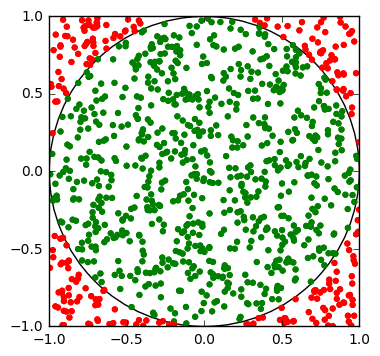

In [157]:
data=darts(1000,1000)
curve(data)

########################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

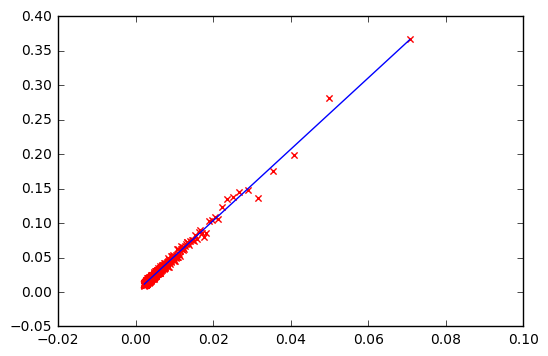

In [177]:
# ***** investigation in two kinds of errors *****
error1 = []
error2 = []
for j in range(1000):
    data=darts_silent(int((j+1)*20),80)
    error1.append(1/np.sqrt((j+1)*200))
    error2.append(data[3][0])
plt.figure()
plt.scatter(error1,error2,marker='x',color='r')

z1 = np.polyfit(error1,error2,1)
p = np.poly1d(z1)
print(p)
plt.plot(error1,p(error1))
plt.show()